In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.ticker as ticker

data_SVN = {
        "PLS": [[15, 5], [8, 11]],
        "CARS": [[18, 2], [7, 12]],
        "GA-iPLS": [[19, 1], [2, 17]],
        "BOSS": [[19, 1], [2, 17]],
        "SVM": [[15, 5], [8, 11]],
        "GA-iPLS + BOSS": [[19, 3], [2, 17]],
        # "GA-iPLS + CARS": [[0, 0], [0, 0]],
}

data_MSC = {
        "PLS": [[16, 5], [4, 15]],
        "CARS": [[16, 5], [4, 15]],
        "GA-iPLS": [[16, 5], [2, 17]],
        "BOSS": [[18, 3], [2, 17]],
        "SVM": [[15, 6], [3, 16]],
        "GA-iPLS + BOSS": [[18, 3], [3, 16]],
        # "GA-iPLS + CARS": [[16, 5], [4, 15]],
}

In [2]:
def plot_confusion_matrix(ax, entry, n_wavelenghts, pos_count, neg_count):
    """
    Plots the confusion matrix as a heatmap on the given Axes.
    The matrix is arranged as:
    
                     Predicted
                [0]         [1]
    Actual [0]  TP          FN 
           [1]  FP          TN
    
    A title is drawn indicating the number of wavelengths.
    The color scale is fixed with vmin=0 and vmax = max(pos_count, neg_count).
    The cell annotation text color is chosen dynamically based on the cell’s brightness.
    """    
    # matrix = np.array(entry[['Healty', 'Unhealty']].values)
    matrix = entry
    
    vmax = max(pos_count, neg_count)
    im = ax.imshow(matrix, cmap='viridis', vmin=0, vmax=vmax)
    
    # Annotate each cell with text using dynamic color based on cell brightness.
    for i in range(2):
        for j in range(2):
            value = matrix[i][j]
            norm_val = value / vmax if vmax else 0
            cell_color = cm.viridis(norm_val)
            r, g, b, _ = cell_color
            luminance = 0.299*r + 0.587*g + 0.114*b
            text_color = 'white' if luminance < 0.5 else 'black'
            ax.text(j, i, f"{value}", ha='center', va='center', color=text_color, fontsize=18)
    
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_title(f"{n_wavelenghts}", fontsize=20)
    return im

def plot_all_groups(type_data, pos_count, neg_count, pdf_filename):
    # Order groups by PLS components (e.g., "2", "3", "4")
    model_groups = list(type_data.keys())
    group_number = len(model_groups)
    n_cols = 3
    n_rows = group_number // n_cols
    if group_number % n_cols != 0:
        n_rows += 1
            
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3.5*n_rows))
    if n_rows == 1:
        axs = np.array([axs])
    if n_cols == 1:
        axs = np.expand_dims(axs, axis=1)
    
    ims = []  # Collect image handles for colorbar scaling
    
    for i, data in enumerate(type_data.values()):
        r = i // n_cols
        c = i % n_cols
        
        print(f"Plotting {model_groups[i]} , row {r}, col {c}")
        
        ax = axs[r, c]
        im = plot_confusion_matrix(ax, data, model_groups[i], pos_count, neg_count)
        ims.append(im)
        # else:
        #     ax.axis('off')
        
        # Set x tick labels on the last row only.
        if r == n_rows - 1:
            ax.set_xticklabels(["Control", f"Water\nStressed"], rotation=45, ha='right', fontsize=18)
        else:
            ax.set_xticklabels([])
        
        # Set y tick labels on the first column only.
        if c == 0:
            ax.set_yticklabels(["Control", f"Water\nStressed"], fontsize=18)
        else:
            ax.set_yticklabels([])
    
    # Adjust layout to leave room on the right for the colorbar.
    plt.tight_layout(rect=[0, 0, 0.85, 0.95], w_pad=0.05, h_pad=2)
    
    # Create a fixed axis for the colorbar.
    cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
    norm = colors.Normalize(vmin=0, vmax=max(pos_count, neg_count))
    sm = cm.ScalarMappable(cmap='viridis', norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical')
    # Force integer ticks
    cbar.ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    cbar.ax.tick_params(labelsize=18)
    
    # Create a fixed accis for the "Predicted" and "Actual" labels.
    fig.text(0.5, -0.02, 'Predicted', ha='center', fontsize=25)
    fig.text(-0.005, 0.5, 'Actual', va='center', rotation='vertical', fontsize=25)
    
    plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')
    plt.show()
    plt.close()

Plotting PLS , row 0, col 0
Plotting CARS , row 0, col 1
Plotting GA-iPLS , row 0, col 2
Plotting BOSS , row 1, col 0
Plotting SVM , row 1, col 1
Plotting GA-iPLS + BOSS , row 1, col 2


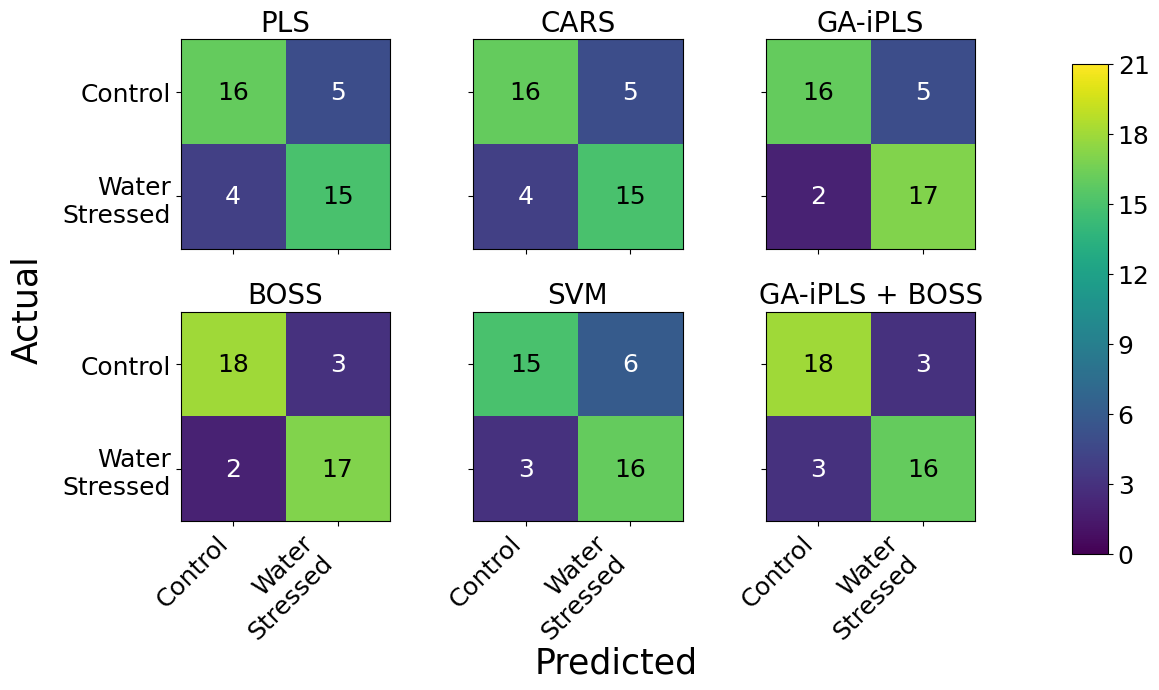

Plotting PLS , row 0, col 0
Plotting CARS , row 0, col 1
Plotting GA-iPLS , row 0, col 2
Plotting BOSS , row 1, col 0
Plotting SVM , row 1, col 1
Plotting GA-iPLS + BOSS , row 1, col 2


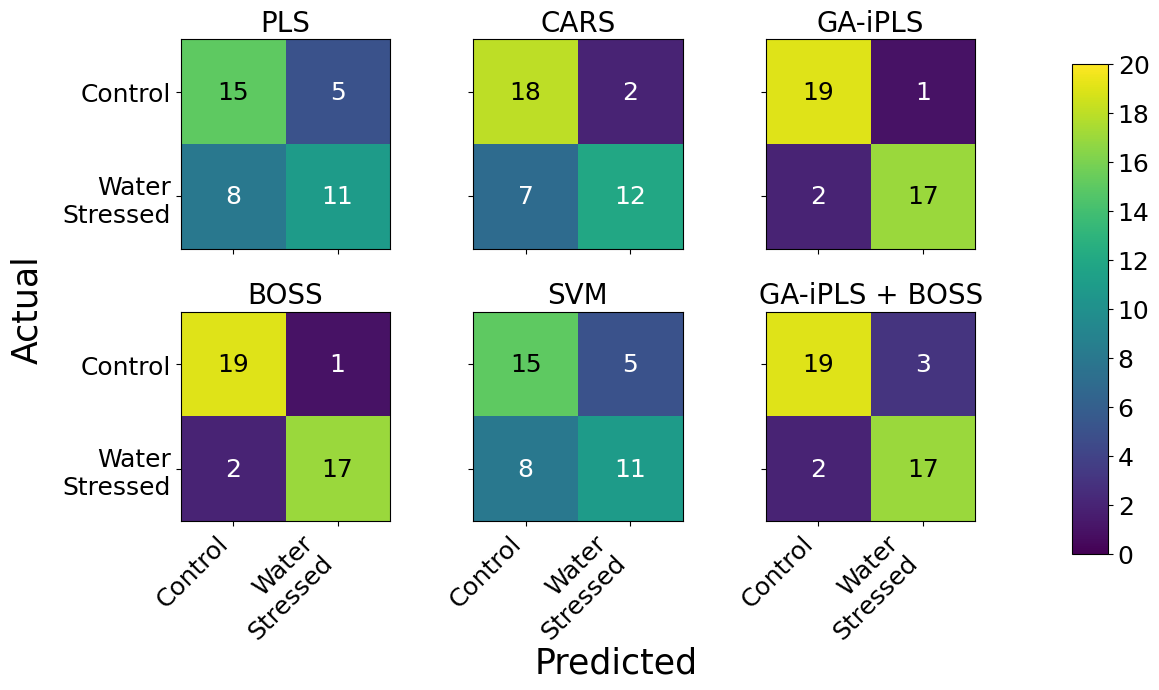

In [3]:
# creae folder if it does not exist
import os
if not os.path.exists('plots'):
    os.makedirs('plots')

plot_all_groups(data_MSC,  pos_count=21, neg_count=19, pdf_filename='plots/MSC_confusion_matrix.pdf')
plot_all_groups(data_SVN, pos_count=20, neg_count=19, pdf_filename='plots/SVN_confusion_matrix.pdf')